<a href="https://colab.research.google.com/github/sy549/Show-Success-Predictor-Project-/blob/main/CISProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
url_titlebasics = "https://datasets.imdbws.com/title.basics.tsv.gz"
url_ratings = "https://datasets.imdbws.com/title.ratings.tsv.gz"
url_akas = "https://datasets.imdbws.com/title.akas.tsv.gz"
url_crew = "https://datasets.imdbws.com/title.crew.tsv.gz"
url_episode = "https://datasets.imdbws.com/title.episode.tsv.gz"
url_principals = "https://datasets.imdbws.com/title.principals.tsv.gz"
url_namebasics = "https://datasets.imdbws.com/name.basics.tsv.gz"

namebasics = pd.read_csv(url_namebasics, sep='\t', compression='gzip')
ratings = pd.read_csv(url_ratings, sep='\t', compression='gzip')
titlebasics = pd.read_csv(url_titlebasics, sep='\t', compression='gzip')
principals = pd.read_csv(url_principals, sep='\t', compression='gzip')
akas = pd.read_csv(url_akas, sep='\t', compression='gzip')
crew = pd.read_csv(url_crew, sep='\t', compression='gzip')
episode = pd.read_csv(url_episode, sep='\t', compression='gzip')

print(f"Name Basics dataset shape: {namebasics.shape}")
print(f"Ratings dataset shape: {ratings.shape}")
print(f"Title Basics dataset shape: {titlebasics.shape}")
print(f"Principals dataset shape: {principals.shape}")
print(f"Akas dataset shape: {akas.shape}")
print(f"Crew dataset shape: {crew.shape}")
print(f"Episode dataset shape: {episode.shape}")

Name Basics dataset shape: (14929399, 6)
Ratings dataset shape: (1608088, 3)
Title Basics dataset shape: (12129635, 9)
Principals dataset shape: (96402531, 6)
Akas dataset shape: (54192359, 8)
Crew dataset shape: (12129635, 3)
Episode dataset shape: (9353482, 4)


In [ ]:
reviews = pd.read_csv('IMDB Dataset.csv', sep=',', quotechar='"', escapechar='\\')
print(f"Reviews dataset shape: {reviews.shape}")
print(reviews.head())

Reviews dataset shape: (50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
titlebasics_clean = titlebasics.dropna(subset=['genres', 'runtimeMinutes'])
ratings_clean = ratings.dropna()
namebasics_clean = namebasics.dropna()
akas_clean = akas.dropna()
crew_clean = crew.dropna()
episode_clean = episode.dropna()
principals_clean = principals.dropna()

titlebasics_clean = titlebasics_clean.replace('\\N', pd.NA)
ratings_clean = ratings_clean.replace('\\N', pd.NA)
namebasics_clean = namebasics_clean.replace('\\N', pd.NA)
akas_clean = akas.replace('\\N', pd.NA)
crew_clean = crew.replace('\\N', pd.NA)
episode_clean = episode.replace('\\N', pd.NA)
principals_clean = principals.replace('\\N', pd.NA)

titlebasics_clean['runtimeMinutes'] = pd.to_numeric(titlebasics_clean['runtimeMinutes'], errors='coerce')
ratings_clean['averageRating'] = pd.to_numeric(ratings_clean['averageRating'], errors='coerce')
ratings_clean['numVotes'] = pd.to_numeric(ratings_clean['numVotes'], errors='coerce')

netflix_data = titlebasics_clean.merge(ratings_clean, on='tconst')

tv_shows = netflix_data[netflix_data['titleType'] == 'tvSeries'].copy()
tv_shows = tv_shows[['tconst', 'primaryTitle', 'genres', 'runtimeMinutes','averageRating', 'numVotes']]
tv_shows = tv_shows.drop_duplicates(subset=['tconst'])

print(f"Final TV shows dataset shape: {tv_shows.shape}")
print(tv_shows.head())

Final TV shows dataset shape: (107577, 6)
          tconst              primaryTitle            genres  runtimeMinutes  \
18810  tt0035803  The German Weekly Review  Documentary,News             NaN   
20862  tt0038276         You Are an Artist         Talk-Show            15.0   
21578  tt0039120                 Americana  Family,Game-Show            30.0   
21579  tt0039122           The Borden Show      Comedy,Music            30.0   
21580  tt0039123             Kraft Theatre             Drama            60.0   

       averageRating  numVotes  
18810            8.1        69  
20862            5.7        16  
21578            3.1        22  
21579            3.2        15  
21580            7.9       244  


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):

    if pd.isna(text):
        return ""

    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = ' '.join(text.split())

    stop_words = set(stopwords.words('english'))
    words = [w for w in text.split() if w not in stop_words]

    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    return ' '.join(words)

reviews['clean_review'] = reviews['review'].apply(preprocess_text)

print("Sample preprocessed review:")
print(reviews['clean_review'].iloc[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sample preprocessed review:
one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each review
reviews['sentiment_score'] = reviews['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

sentiment_counts = reviews['sentiment'].value_counts()
sentiment_percentages = reviews['sentiment'].value_counts(normalize=True) * 100

print("Sentiment distribution:")
for s, c in sentiment_counts.items():
    print(f"{s}: {c} reviews ({sentiment_percentages[s]:.1f}%)")

print("\nSentiment score statistics:")
print(f"Mean:   {reviews['sentiment_score'].mean():.3f}")
print(f"Median: {reviews['sentiment_score'].median():.3f}")
print(f"Std:    {reviews['sentiment_score'].std():.3f}")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment distribution:
positive: 25000 reviews (50.0%)
negative: 25000 reviews (50.0%)

Sentiment score statistics:
Mean:   0.299
Median: 0.820
Std:    0.806


sentiment
positive    25000
negative    25000
Name: count, dtype: int64

VADER score by original label:
               mean  median       std  count
sentiment                                   
negative  -0.067020 -0.2956  0.818708  25000
positive   0.665439  0.9549  0.600828  25000


/tmp/ipython-input-3221285382.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['positive', 'negative'])


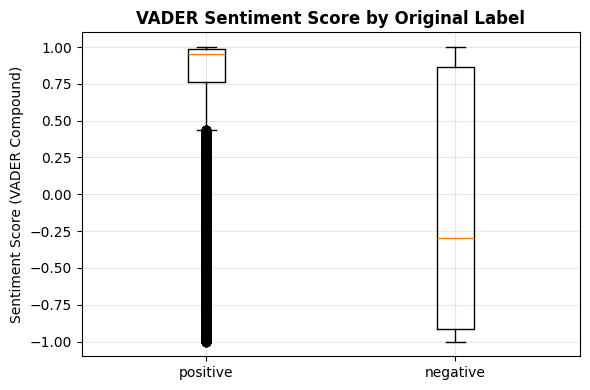

In [ ]:
import numpy as np

# Original labels: positive/negative (from dataset)
print(reviews['sentiment'].value_counts())

# Average VADER score for each original label
group_stats = reviews.groupby('sentiment')['sentiment_score'].agg(['mean', 'median', 'std', 'count'])
print("\nVADER score by original label:")
print(group_stats)

# Boxplot: VADER scores per original label
plt.figure(figsize=(6, 4))
data_to_plot = [reviews.loc[reviews['sentiment'] == 'positive', 'sentiment_score'],
                reviews.loc[reviews['sentiment'] == 'negative', 'sentiment_score']]

plt.boxplot(data_to_plot, labels=['positive', 'negative'])
plt.title('VADER Sentiment Score by Original Label', fontweight='bold')
plt.ylabel('Sentiment Score (VADER Compound)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('sentiment_score_by_label.png', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipython-input-3447282816.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax4.boxplot(data_to_plot, labels=['positive', 'negative'])
/tmp/ipython-input-3447282816.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


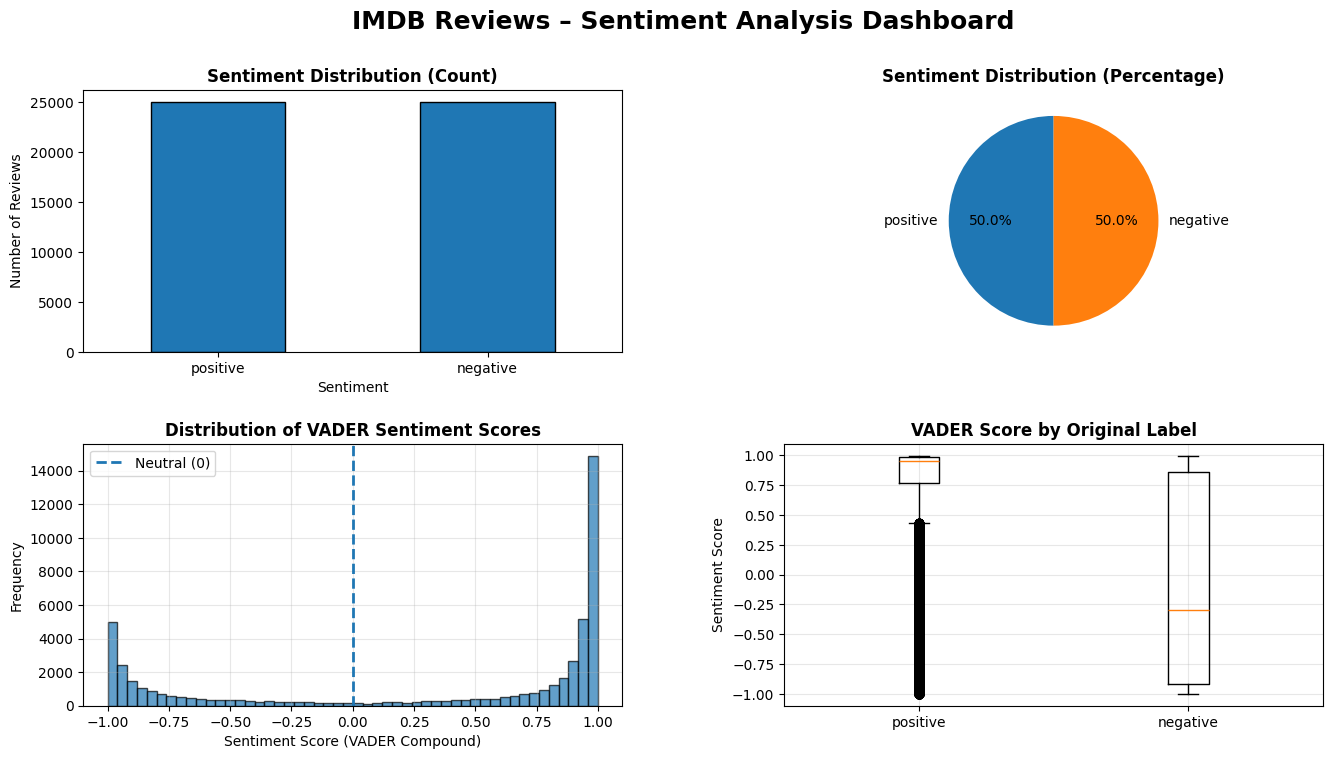

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Ensure reviews DataFrame and sentiment_score are available
# This code is included to make this cell runnable independently if previous cells haven't been executed
reviews = pd.read_csv('IMDB Dataset.csv', sep=',', quotechar='"', escapechar='\\')
nltk.download('vader_lexicon', quiet=True)
sia = SentimentIntensityAnalyzer()
reviews['sentiment_score'] = reviews['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)

fig.suptitle('IMDB Reviews – Sentiment Analysis Dashboard',
             fontsize=18, fontweight='bold', y=0.98)

# Ensure sentiment_counts is defined for plotting
sentiment_counts = reviews['sentiment'].value_counts()
sentiment_percentages = reviews['sentiment'].value_counts(normalize=True) * 100

# 1. Bar chart of sentiment labels
ax1 = fig.add_subplot(gs[0, 0])
sentiment_counts.plot(kind='bar', ax=ax1, edgecolor='black')
ax1.set_title('Sentiment Distribution (Count)', fontweight='bold')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Number of Reviews')
ax1.tick_params(axis='x', rotation=0)

# 2. Pie chart of sentiment
ax2 = fig.add_subplot(gs[0, 1])
sentiment_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_title('Sentiment Distribution (Percentage)', fontweight='bold')
ax2.set_ylabel('')

# 3. Histogram of sentiment scores
ax3 = fig.add_subplot(gs[1, 0])
ax3.hist(reviews['sentiment_score'], bins=50, edgecolor='black', alpha=0.7)
ax3.axvline(x=0, linestyle='--', linewidth=2, label='Neutral (0)')
ax3.set_title('Distribution of VADER Sentiment Scores', fontweight='bold')
ax3.set_xlabel('Sentiment Score (VADER Compound)')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Boxplot: VADER score by original label
ax4 = fig.add_subplot(gs[1, 1])
data_to_plot = [reviews.loc[reviews['sentiment'] == 'positive', 'sentiment_score'],
                reviews.loc[reviews['sentiment'] == 'negative', 'sentiment_score']]
ax4.boxplot(data_to_plot, labels=['positive', 'negative'])
ax4.set_title('VADER Score by Original Label', fontweight='bold')
ax4.set_ylabel('Sentiment Score')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('sentiment_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
# k- means clustering
reviews = pd.read_csv('IMDB Dataset.csv', sep=',', quotechar='"', escapechar='\\')

reviews.head()

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = ' '.join(text.split())
    stop_words = set(stopwords.words('english'))
    words = [w for w in text.split() if w not in stop_words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    return ' '.join(words)

reviews['clean_review'] = reviews['review'].apply(preprocess_text)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

texts = reviews['clean_review'].astype(str)

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
reviews['cluster'] = kmeans.fit_predict(X)

reviews[['review', 'cluster']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,review,cluster
0,One of the other reviewers has mentioned that ...,2
1,A wonderful little production. <br /><br />The...,2
2,I thought this was a wonderful way to spend ti...,2
3,Basically there's a family where a little boy ...,2
4,"Petter Mattei's ""Love in the Time of Money"" is...",2


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['cluster']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'cluster'}, axis=1)
              .sort_values('cluster', ascending=True))
  xs = counted['cluster']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('cluster', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('review')):
  _plot_series(series, series_name, i)
  fig.legend(title='review', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster')
_ = plt.ylabel('count()')

In [ ]:
# Decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode sentiment (positive=1, negative=0)
reviews['label'] = reviews['sentiment'].map({'positive':1, 'negative':0})

y = reviews['label']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Decision Tree Model
dtree = DecisionTreeClassifier(max_depth=15, random_state=42)
dtree.fit(X_train, y_train)

# Predictions
y_pred = dtree.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


NameError: name 'reviews' is not defined